In [25]:
import json
import pandas as pd
import numpy as np
from math import *

with open('planes_data.json','r') as read_file:
    planes = json.load(read_file)
    read_file.close()
pd.DataFrame(planes)


,Airbus A220-100,Airbus A220-300,Airbus A300,Airbus A310,Airbus A318,Airbus A319,Airbus A319neo,Airbus A320,Airbus A320neo,Airbus A321,...,Суперджет-100,Ту-134,Ту-154,Ту-204-100,Ту-204-300,Ту-214,Ту-334,Як-40,Як-42,Як-242 (МС-21)
km,4000,4000,5270,4000,4375,5750,6950,6100,6850,5450,...,3050,1750,2780,4400,6400,6200,2040,1200,1700,5000
seats,117,140,345,279,117,156,156,180,180,228,...,96,76,172,214,166,210,102,31,120,157


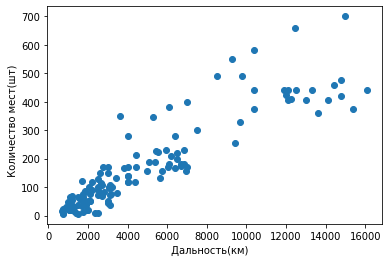

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel(' Дальность(км)    ')
ax.set_ylabel(' Количество мест(шт)    ')
ax.scatter([planes[i]['km'] for i in planes.keys()],[planes[i]['seats'] for i in planes.keys()])
plt.show()

In [27]:
# АЛГОРИТМ 
# НАЗНАЧАЕМ КЛАССТЕРЫ


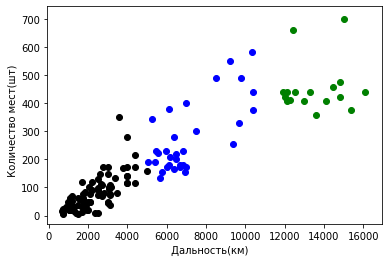

In [28]:
k1 = [2000,100]
k2 = [8000,350]
k3 = [15000,500]

k1_=[0,0]
k2_=[0,0]
k3_=[0,0]

planes1 = {}
planes2 = {}
planes3 = {}

change = True
changeCount = 0
count = 0

while k1_!=k1 and k2_!=k2 and k3_!=k3:
    planes1_ = {}
    planes2_ = {}
    planes3_ = {}
    #
    for i in planes.keys():
        r1 = sqrt((planes[i]['km']-k1[0])**2+(planes[i]['seats']-k1[1])**2)
        r2 = sqrt((planes[i]['km']-k2[0])**2+(planes[i]['seats']-k2[1])**2)
        r3 = sqrt((planes[i]['km']-k3[0])**2+(planes[i]['seats']-k3[1])**2)
        r = min(r1,r2,r3)
        xplane = {
            i: {
                'km':planes[i]['km'],
                'seats':planes[i]['seats']
            }
        }
        if r==r1:
            planes1_.update(xplane)
        elif r==r2:
            planes2_.update(xplane)
        elif r==r3:
            planes3_.update(xplane)
    #
    c1_x = 0
    c1_y = 0
    for i in planes1_.keys():
        c1_x += planes1_[i]['km']
        c1_y += planes1_[i]['seats']
    k1_[0] = c1_x/len(planes1_.keys())
    k1_[1] = c1_y/len(planes1_.keys())
    #
    c2_x = 0
    c2_y = 0
    for i in planes2_.keys():
        c2_x += planes2_[i]['km']
        c2_y += planes2_[i]['seats']
    k2_[0] = c2_x/len(planes1_.keys())
    k2_[1] = c2_y/len(planes1_.keys())
    #
    c3_x = 0
    c3_y = 0
    for i in planes3_.keys():
        c3_x += planes3_[i]['km']
        c3_y += planes3_[i]['seats']
    k3_[0] = c3_x/len(planes3_.keys())
    k3_[1] = c3_y/len(planes3_.keys())
    
    if planes1==planes1_ and planes2==planes2_ and planes3==planes3_:
        changeCount+=1
    else:
        changeCount=0
    if changeCount==50:
        break 
    
    planes1 = planes1_
    planes2 = planes2_
    planes3 = planes3_     

    # print(count)
    # count+=1

pd.DataFrame(planes1)
pd.DataFrame(planes2)
pd.DataFrame(planes3)

fig, ax = plt.subplots()
ax.set_xlabel(' Дальность(км)    ')
ax.set_ylabel(' Количество мест(шт)    ')

ax.scatter([planes1[i]['km'] for i in planes1.keys()],[planes1[i]['seats'] for i in planes1.keys()],c='black')
ax.scatter([planes2[i]['km'] for i in planes2.keys()],[planes2[i]['seats'] for i in planes2.keys()],c='blue')
ax.scatter([planes3[i]['km'] for i in planes3.keys()],[planes3[i]['seats'] for i in planes3.keys()],c='green')
plt.show()


In [29]:
pd.DataFrame(planes1)


,Airbus A220-100,Airbus A220-300,Airbus A310,Airbus A318,Ан-24,Ан-28,Ан-38,Ан-74,Ан-140,Ан-148,...,Shorts 360,Су-80,Суперджет-100,Ту-134,Ту-154,Ту-204-100,Ту-334,Як-40,Як-42,Як-242 (МС-21)
km,4000,4000,4000,4375,1000,700,900,1800,1750,2100,...,1100,1300,3050,1750,2780,4400,2040,1200,1700,5000
seats,117,140,279,117,48,17,27,52,52,77,...,39,30,96,76,172,214,102,31,120,157


In [30]:
pd.DataFrame(planes2)


,Airbus A300,Airbus A319,Airbus A319neo,Airbus A320,Airbus A320neo,Airbus A321,Airbus A321neo,Airbus A330-300,Boeing 707,Boeing 737-600,...,Boeing 767-200,Boeing 767-300,Boeing 767-400,Boeing 777-300,Ил-62,Ил-96,Lockheed L-1011 TriStar,Douglas DC-10,Ту-204-300,Ту-214
km,5270,5750,6950,6100,6850,5450,6850,10400,6700,5650,...,9400,9700,10400,9250,6700,7500,7000,6100,6400,6200
seats,345,156,156,180,180,228,230,440,174,132,...,255,328,375,550,180,300,400,380,166,210


In [31]:
pd.DataFrame(planes3)

,Airbus A330-200,Airbus A330-800neo,Airbus A330-900neo,Airbus A340-200,Airbus A340-300,Airbus A340-500,Airbus A340-600,Airbus A350-900,Airbus A350-1000,Airbus A380,CRAIC CR929,Boeing 747-400,Boeing 777-200,Boeing 787-8,Boeing 787-9,Boeing 787-10,McDonnell Douglas MD-11
km,12100,13000,12100,14800,13300,16075,14450,15400,14800,15000,12000,12435,12525,13600,14100,11900,12270
seats,406,406,440,420,440,440,457,375,475,700,422,660,440,359,406,440,410


In [32]:
k1 = [2000,75]
k2 = [5000,200]
k3 = [10000,3500]
k4 = [15000,450]

k1_=[0,0]
k2_=[0,0]
k3_=[0,0]
k4_=[0,0]

planes1 = {}
planes2 = {}
planes3 = {}
planes4 = {}

change = True
changeCount = 0
count = 0

while k1_!=k1 and k2_!=k2 and k3_!=k3:
    planes1_ = {}
    planes2_ = {}
    planes3_ = {}
    planes4_ = {}
    #
    for i in planes.keys():
        r1 = sqrt((planes[i]['km']-k1[0])**2+(planes[i]['seats']-k1[1])**2)
        r2 = sqrt((planes[i]['km']-k2[0])**2+(planes[i]['seats']-k2[1])**2)
        r3 = sqrt((planes[i]['km']-k3[0])**2+(planes[i]['seats']-k3[1])**2)
        r4 = sqrt((planes[i]['km']-k4[0])**2+(planes[i]['seats']-k4[1])**2)
        r = min(r1,r2,r3,r4)
        xplane = {
            i: {
                'km':planes[i]['km'],
                'seats':planes[i]['seats']
            }
        }
        if r==r1:
            planes1_.update(xplane)
        elif r==r2:
            planes2_.update(xplane)
        elif r==r3:
            planes3_.update(xplane)
        elif r==r4:
            planes4_.update(xplane)
    #
    c1_x = 0
    c1_y = 0
    for i in planes1_.keys():
        c1_x += planes1_[i]['km']
        c1_y += planes1_[i]['seats']
    k1_[0] = c1_x/len(planes1_.keys())
    k1_[1] = c1_y/len(planes1_.keys())
    #
    c2_x = 0
    c2_y = 0
    for i in planes2_.keys():
        c2_x += planes2_[i]['km']
        c2_y += planes2_[i]['seats']
    k2_[0] = c2_x/len(planes1_.keys())
    k2_[1] = c2_y/len(planes1_.keys())
    #
    c3_x = 0
    c3_y = 0
    for i in planes3_.keys():
        c3_x += planes3_[i]['km']
        c3_y += planes3_[i]['seats']
    k3_[0] = c3_x/len(planes3_.keys())
    k3_[1] = c3_y/len(planes3_.keys())

    c4_x = 0
    c4_y = 0
    for i in planes4_.keys():
        c4_x += planes4_[i]['km']
        c4_y += planes4_[i]['seats']
    k4_[0] = c4_x/len(planes4_.keys())
    k4_[1] = c4_y/len(planes4_.keys())
    
    if planes1==planes1_ and planes2==planes2_ and planes3==planes3_ and planes4==planes4:
        changeCount+=1
    else:
        changeCount=0
    if changeCount==50:
        break 
    
    planes1 = planes1_
    planes2 = planes2_
    planes3 = planes3_     
    planes4 = planes4_
    # print(count)
    # count+=1

pd.DataFrame(planes1)
pd.DataFrame(planes2)
pd.DataFrame(planes3)
pd.DataFrame(planes4)

fig, ax = plt.subplots()
ax.set_xlabel(' Дальность(км)    ')
ax.set_ylabel(' Количество мест(шт)    ')

ax.scatter([planes1[i]['km'] for i in planes1.keys()],[planes1[i]['seats'] for i in planes1.keys()],c='black')
ax.scatter([planes2[i]['km'] for i in planes2.keys()],[planes2[i]['seats'] for i in planes2.keys()],c='blue')
ax.scatter([planes3[i]['km'] for i in planes3.keys()],[planes3[i]['seats'] for i in planes3.keys()],c='green')
ax.scatter([planes3[i]['km'] for i in planes4.keys()],[planes4[i]['seats'] for i in planes4.keys()],c='pink')
plt.show()


KeyError: 'Airbus A330-200'